# Homework 4: Group 1
#### Linear Regression (NYC + Boston) 

#### David Jung, Ryan Voges, Emily Blake, Spencer Powell, Abraham Alhomadi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

In [2]:
nyc = pd.read_csv("nyc-rolling-sales_clean.csv", sep=",")

In [3]:
rand_state= 1000

- 1. Change the type of the feature variables as you see fit!

In [4]:
# Looking at the data to see if any feature variables need to be changed
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         30236 non-null  object 
 1   NEIGHBORHOOD                    30236 non-null  object 
 2   BUILDING CLASS CATEGORY         30236 non-null  object 
 3   TAX CLASS AT PRESENT            30236 non-null  object 
 4   BUILDING CLASS AT PRESENT       30236 non-null  object 
 5   ZIP CODE                        30236 non-null  int64  
 6   RESIDENTIAL UNITS               30236 non-null  int64  
 7   COMMERCIAL UNITS                30236 non-null  int64  
 8   TOTAL UNITS                     30236 non-null  int64  
 9   LAND SQUARE FEET                30236 non-null  float64
 10  GROSS SQUARE FEET               30236 non-null  float64
 11  YEAR BUILT                      30236 non-null  int64  
 12  TAX CLASS AT TIME OF SALE       

In [5]:
for col in nyc.columns:
    print(col, nyc[col].nunique())

BOROUGH 5
NEIGHBORHOOD 242
BUILDING CLASS CATEGORY 38
TAX CLASS AT PRESENT 9
BUILDING CLASS AT PRESENT 115
ZIP CODE 171
RESIDENTIAL UNITS 72
COMMERCIAL UNITS 20
TOTAL UNITS 74
LAND SQUARE FEET 4105
GROSS SQUARE FEET 3589
YEAR BUILT 137
TAX CLASS AT TIME OF SALE 3
BUILDING CLASS AT TIME OF SALE 115
SALE PRICE 4848
SALE DATE 327
sale_year 2
sale_month 12


In [6]:
# Changing variables to categorical
categorical = ["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT"]

In [7]:
categoricals = list(nyc.drop(['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE', 'SALE DATE'], axis=1).columns)
print(categoricals)       

['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE', 'sale_year', 'sale_month']


In [8]:
nyc['SALE DATE'] = pd.to_datetime(nyc['SALE DATE'], errors='coerce')

In [9]:
nyc['sale_year'] = pd.DatetimeIndex(nyc['SALE DATE']).year.astype("category")
nyc['sale_month'] = pd.DatetimeIndex(nyc['SALE DATE']).month.astype("category")
pd.crosstab(nyc['sale_month'], nyc['sale_year'])

sale_year,2016,2017
sale_month,,
1,0,2432
2,0,2323
3,0,2782
4,0,2344
5,0,2565
6,0,2931
7,0,2328
8,0,1937
9,2807,0


In [10]:
for col in categoricals:
    nyc[col]=nyc[col].astype("category")

In [11]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         30236 non-null  category      
 1   NEIGHBORHOOD                    30236 non-null  category      
 2   BUILDING CLASS CATEGORY         30236 non-null  category      
 3   TAX CLASS AT PRESENT            30236 non-null  category      
 4   BUILDING CLASS AT PRESENT       30236 non-null  category      
 5   ZIP CODE                        30236 non-null  category      
 6   RESIDENTIAL UNITS               30236 non-null  int64         
 7   COMMERCIAL UNITS                30236 non-null  int64         
 8   TOTAL UNITS                     30236 non-null  int64         
 9   LAND SQUARE FEET                30236 non-null  float64       
 10  GROSS SQUARE FEET               30236 non-null  float64       
 11  YE

2. Define your target variable as target= log(SALE PRICE) and add it to your data
frame. Explain why this transformation would boost the performance of your
linear model?

In [12]:
nyc["LOG(SALE PRICE)"]= np.log(nyc["SALE PRICE"])


/Users/emilyblake/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

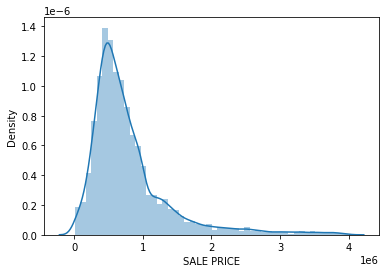

In [13]:
sns.distplot(nyc["SALE PRICE"])

/Users/emilyblake/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOG(SALE PRICE)', ylabel='Density'>

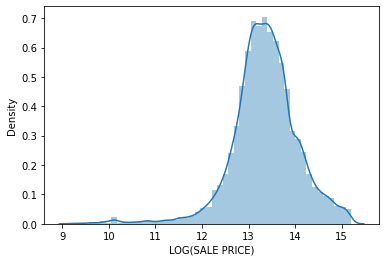

In [14]:
sns.distplot(nyc["LOG(SALE PRICE)"])

- The log transformation of "SALE PRICE" fixed for some of the skewedness in the orginal data. Our linear model will now be a better fit. 

3. Define your feature space (X). You can pick as many features as possible! it's your call!

In [15]:
# Defining LOG(SALE PRICE) as y variable and dropping redundant variables for our x variable
y = nyc['LOG(SALE PRICE)']
X = nyc.drop(['LOG(SALE PRICE)', 'ZIP CODE', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','BUILDING CLASS AT PRESENT', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS','TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE','SALE DATE'], axis=1)

4. Use get dummies( drop_first=True ) function from pandas package to make the
categorical variables into dummy variables. How many features you have now?
wow! welcome to Machine Learning.

In [16]:
X1 = pd.get_dummies(X, drop_first=True)

In [17]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Columns: 397 entries, TOTAL UNITS to sale_month_12
dtypes: float64(3), int64(1), uint8(393)
memory usage: 12.3 MB


5. Split the data into test (30%) and train set (70%)

In [18]:
from sklearn.model_selection import train_test_split

X1_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=rand_state)


np.round(len(X1_train)/len(X),3)

0.7

In [19]:
X1_train.head()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,NEIGHBORHOOD_ALPHABET CITY,NEIGHBORHOOD_ANNADALE,...,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
27919,1,4000.0,1105.0,480000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26034,1,3918.0,1700.0,760000.0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
27154,2,4000.0,2012.0,780000.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
13684,2,2003.0,2532.0,1140000.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28389,1,2938.0,1632.0,600000.0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


6. Use LinearRegression() model from Sklearn package to train the model. Do the
followings: (15 points)
    1. Save the predicted values for the test set in y hat test. (5 points)
    2. Construct a data frame named log predictions which has 3 columns: y test, y hat test , resid.(5 points)
    3. Report the RMSE test (RMSE in the test set) (5 points)

In [20]:
nyc_model = LinearRegression()

In [21]:
nyc_model.fit(X1_train, y_train)

LinearRegression()

In [22]:
y_hat_test = nyc_model.predict(X_test)

In [23]:
nyc_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_hat_test, 'resid': y_test - y_hat_test})
nyc_predictions.head()

,actuals,predictions,resid
3767,14.077875,13.994780,0.083095
24270,13.199324,13.028527,0.170797
27718,13.384728,13.106505,0.278223
6232,12.873902,12.901989,-0.028087
11161,13.710150,13.603800,0.106350


In [24]:
MSE_test = np.mean(np.square(nyc_predictions['resid']))
np.round(MSE_test,3)

0.128

In [25]:
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.358

7. Estimate the RMSE test using K-Fold Cross Validation technique (try K=5 and
K=10) and name them as RMSE CV5 and RMSE CV10. (15 points)

In [26]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [27]:
my_estimator = LinearRegression()

In [28]:
NMSE10 = cross_val_score(estimator=my_estimator, X=X1_train, y=y_train, cv=10, scoring="neg_mean_squared_error")

In [32]:
MSE10= -NMSE10
MSE10

array([0.15071831, 0.14208018, 0.10913259, 0.20613984, 0.13612341,
       0.1432074 , 0.11795218, 0.12308638, 0.12012878, 0.11703645])

In [33]:
MSE_CV10 = np.mean(MSE10)
np.round(MSE_CV10,3)

0.137

In [34]:
RMSE10 = np.sqrt(MSE10)
RMSE10

array([0.38822456, 0.37693524, 0.33035222, 0.45402626, 0.36894906,
       0.37842754, 0.34344167, 0.35083668, 0.34659599, 0.3421059 ])

In [35]:
RMSE_CV10 = np.mean(RMSE10)
np.round(RMSE_CV10,3)

0.368

In [36]:
NMSE5 = cross_val_score(estimator=my_estimator, X=X1_train, y=y_train, cv=5, scoring="neg_mean_squared_error")

In [37]:
MSE5= -NMSE5
MSE5

array([0.14671203, 0.16035018, 0.13891423, 0.12167686, 0.11897507])

In [38]:
MSE_CV5 = np.mean(MSE5)
np.round(MSE_CV5,3)

0.137

In [39]:
RMSE5 = np.sqrt(MSE5)
RMSE5

array([0.38303006, 0.40043749, 0.37271199, 0.3488221 , 0.34492762])

In [40]:
RMSE_CV5 = np.mean(RMSE5)
np.round(RMSE_CV5,3)

0.37

8. Compare RMSE CV with RMSE test from part 3 and explain your observation?
(5 points)

In [46]:
RSME_compare = pd.DataFrame({'actual':RMSE_test, 'prediction10':RMSE_CV10, 'prediction5':RMSE_CV5}, index=[1])
RSME_compare.head()

,actual,prediction10,prediction5
1,0.357677,0.36799,0.369986


This comparison shows that the actual prediction is quite accurate given the two cross validation predictions are similar 